In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
train = pd.read_csv('train.csv', index_col='index')
test = pd.read_csv('test.csv', index_col='index')
submission = pd.read_csv('sample_submission.csv')

train.shape, test.shape, submission.shape

((26457, 19), (10000, 18), (10000, 4))

In [3]:
display(train.head(2))
display(test.head(2))

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [5]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [6]:
train = train.drop(columns='occyp_type', axis=1)
test = test.drop(columns='occyp_type', axis=1)

In [7]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [8]:
train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0


In [9]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
train['car'] = train['car'].replace(['N','Y'],[0,1])
train['reality'] = train['reality'].replace(['N','Y'],[0,1])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [10]:
test['gender'] = test['gender'].replace(['F','M'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  int64  
 1   car            10000 non-null  int64  
 2   reality        10000 non-null  int64  
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  family_size    10000 non-null  float64
 16  begin_month    10000 non-null  float64
dtypes: float64(3), int64(10), object(4)
memory usa

In [11]:
train = train.drop(columns='FLAG_MOBIL', axis=1)
test = test.drop(columns='FLAG_MOBIL', axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['income_type']=le.fit_transform(train['income_type'])
test['income_type']=le.transform(test['income_type'])

train['edu_type']=le.fit_transform(train['edu_type'])
test['edu_type']=le.transform(test['edu_type'])

train['family_type']=le.fit_transform(train['family_type'])
test['family_type']=le.transform(test['family_type'])

train['house_type']=le.fit_transform(train['house_type'])
test['house_type']=le.transform(test['house_type'])

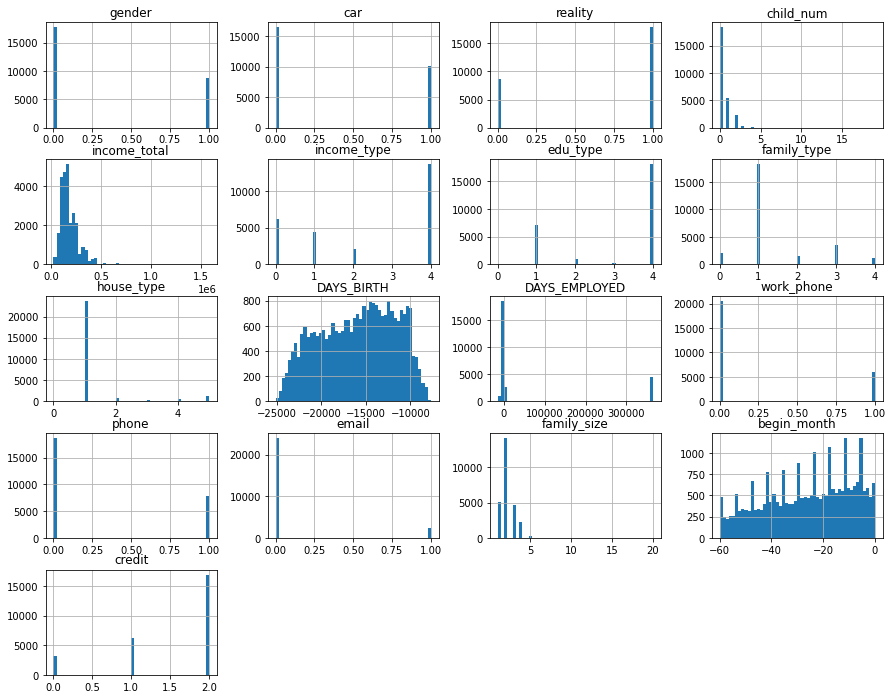

In [13]:
train.hist(bins=50, figsize=(15,12));

In [14]:
train['DAYS_EMPLOYED'].value_counts(ascending=False)

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [15]:
train.loc[train['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED']=1
test.loc[test['DAYS_EMPLOYED'] > 0,'DAYS_EMPLOYED']=1

In [16]:
train['DAYS_EMPLOYED'].value_counts(ascending=False)

 1        4438
-401        57
-1539       47
-200        45
-2087       44
          ... 
-10475       1
-2202        1
-2552        1
-680         1
-4973        1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [17]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,0,1,0,2.0,-22.0,2.0
3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,0,1,0,2.0,-37.0,0.0
4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,0,0,0,2.0,-26.0,2.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  family_size    26457 non-null  float64
 15  begin_month    26457 non-null  float64
 16  credit         26457 non-null  float64
dtypes: float64(4), int64(13)
memory usage: 3.6 MB


In [19]:
train['family_size'] = pd.to_numeric(train['family_size'], downcast='unsigned')
test['family_size'] = pd.to_numeric(test['family_size'], downcast='unsigned')

In [20]:
train['credit'] = pd.to_numeric(train['credit'], downcast='unsigned')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  family_size    26457 non-null  uint8  
 15  begin_month    26457 non-null  float64
 16  credit         26457 non-null  uint8  
dtypes: float64(2), int64(13), uint8(2)
memory usage: 3

In [21]:
label_name = 'credit'
label_name

'credit'

In [22]:
X = train.drop(columns=label_name, axis=1)
y = train[label_name]

X.shape, y.shape

((26457, 16), (26457,))

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                   stratify=y, 
                                                   test_size=0.25,
                                                   random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19842, 16), (6615, 16), (19842,), (6615,))

In [24]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_val = mm.transform(X_val)
test = mm.transform(test)

In [25]:
import tensorflow as tf

In [26]:
input_shape = X.shape[1]
input_shape

16

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 19,075
Trainable params: 19,075
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [31]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.25, 
                    callbacks=[early_stop], verbose=0)

In [32]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.819482,0.688731,0.821004,0.685749
296,0.818568,0.689537,0.817280,0.686555
297,0.819137,0.686983,0.818677,0.688571
298,0.820812,0.688395,0.817476,0.687966
299,0.817129,0.688999,0.819685,0.687563


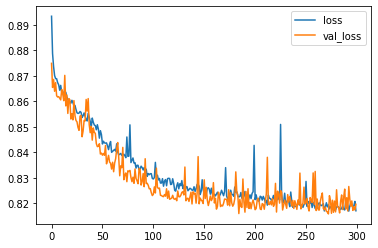

In [33]:
df_hist[['loss', 'val_loss']].plot()

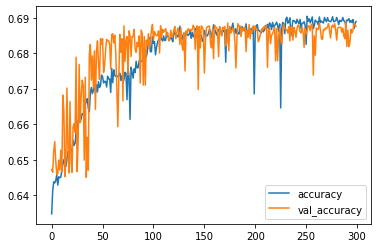

In [34]:
df_hist[['accuracy', 'val_accuracy']].plot()

In [35]:
y_pred = model.predict(test)
y_pred.shape

313/313 [==============================] - 1s 1ms/step


(10000, 3)

In [36]:
y_predict = y_pred
y_predict

array([[0.10913426, 0.14060932, 0.75025636],
       [0.12839952, 0.20736638, 0.66423404],
       [0.11971979, 0.20780692, 0.6724733 ],
       ...,
       [0.10467339, 0.13787341, 0.7574532 ],
       [0.11965873, 0.17325455, 0.7070867 ],
       [0.1038845 , 0.23945391, 0.65666157]], dtype=float32)

In [43]:
submission[['0','1','2']] = y_predict
submission

,index,0,1,2
0,26457,0.109134,0.140609,0.750256
1,26458,0.128400,0.207366,0.664234
2,26459,0.119720,0.207807,0.672473
3,26460,0.106814,0.143858,0.749328
4,26461,0.130339,0.231010,0.638651
...,...,...,...,...
9995,36452,0.131340,0.250923,0.617738
9996,36453,0.115578,0.189863,0.694559
9997,36454,0.104673,0.137873,0.757453
9998,36455,0.119659,0.173255,0.707087


In [44]:
file_name = 'submission.csv'
submission.to_csv(file_name, index=False)

In [45]:
pd.read_csv(file_name).head(2)

,index,0,1,2
0,26457,0.109134,0.140609,0.750256
1,26458,0.128400,0.207366,0.664234
